In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [3]:
aisles = pd.read_csv("aisles.csv")
dep = pd.read_csv("departments.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
product = pd.read_csv("products.csv")
submission = pd.read_csv("sample_submission.csv")

In [4]:
submission

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


In [5]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [6]:
dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [28]:
product[product['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [29]:
product[product['department_id'] == 2]

,product_id,product_name,aisle_id,department_id
85,86,"Camilia, Single Liquid Doses",6,2
505,506,Arrowroot Powder,6,2
534,535,Rescue Remedy,6,2
675,676,Sunset Blush,6,2
712,713,Pink Moscato California,6,2
...,...,...,...,...
49540,49541,Sweet Echinacea,6,2
49541,49542,Grapefruit Bergamot Foaming Handwash,6,2
49595,49596,Psyllium Husk Powder,6,2
49612,49613,Sirloin Tip Roast,6,2


In [8]:
print(prior.shape)
prior

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [9]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [10]:
print(len(prior) + len(train))
ot = pd.concat([prior, train])
ot = ot.sort_values(by='order_id').reset_index(drop=True)
ot

33819106


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,10246,3,0
2,1,49683,4,0
3,1,43633,5,1
4,1,13176,6,0
...,...,...,...,...
33819101,3421083,35211,5,0
33819102,3421083,39678,6,1
33819103,3421083,11352,7,0
33819104,3421083,4600,8,0


In [11]:
print(order.shape)
order

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [12]:
print(train['order_id'].nunique())
print(len(order[order['eval_set'] == 'train']))
print(len(order[order['eval_set'] == 'test']))

131209
131209
75000


In [13]:
item_info = pd.merge(product, aisles, on ="aisle_id")
item_info.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [14]:
item_info = pd.merge(item_info, dep, on="department_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [15]:
df = pd.merge(item_info, ot, on="product_id")
print(df.shape)
df

(33819106, 9)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
...,...,...,...,...,...,...,...,...,...
33819101,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3054471,19,1
33819102,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3136178,12,0
33819103,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3174062,10,0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3220368,16,0


In [16]:
df = pd.merge(df, order, on='order_id')
print(df.shape)
df

(33819106, 15)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,31522,1,1,31188,prior,3,3,11,4.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   aisle                   object 
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [18]:
df.isnull().sum()

product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
order_id                        0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [19]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [20]:
# df.rename(columns={'product_id' : '제품번호', 'product_name' : '제품명', 'aisle_id' : '통로번호', 'department_id': '부서번호', 'department' : '카테고리', 'aisle' : '통로이름', 'order_id': '주문번호'}, inplace = True)
# df.head()

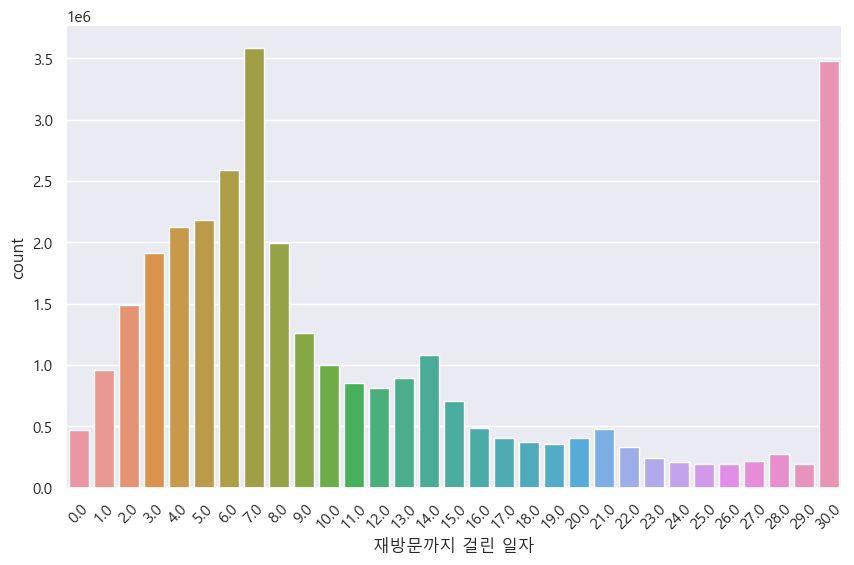

In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'days_since_prior_order')
plt.xlabel('재방문까지 걸린 일자')
plt.xticks(rotation=45)

plt.show()

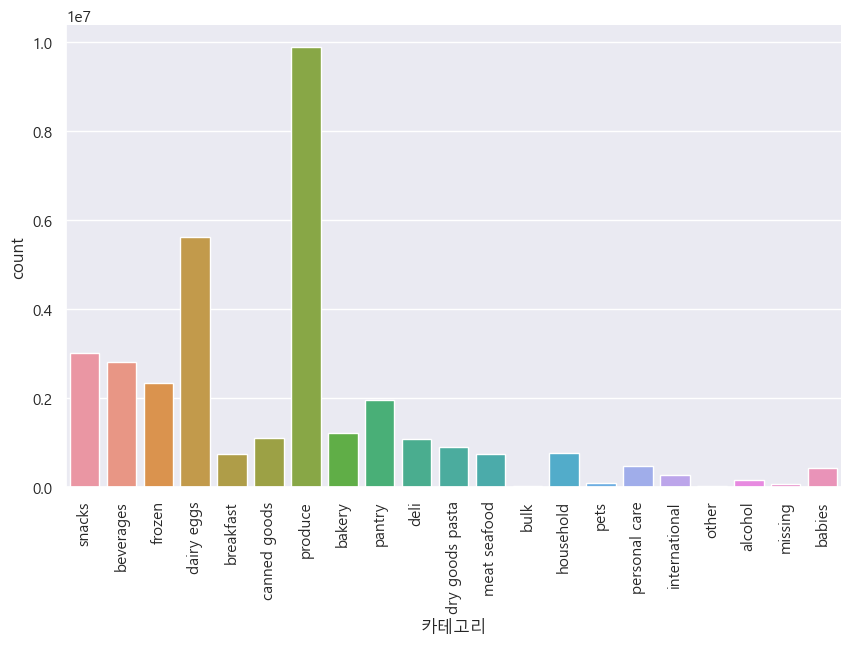

In [24]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'department')
plt.xlabel('카테고리')
plt.xticks(rotation=90)

plt.show()

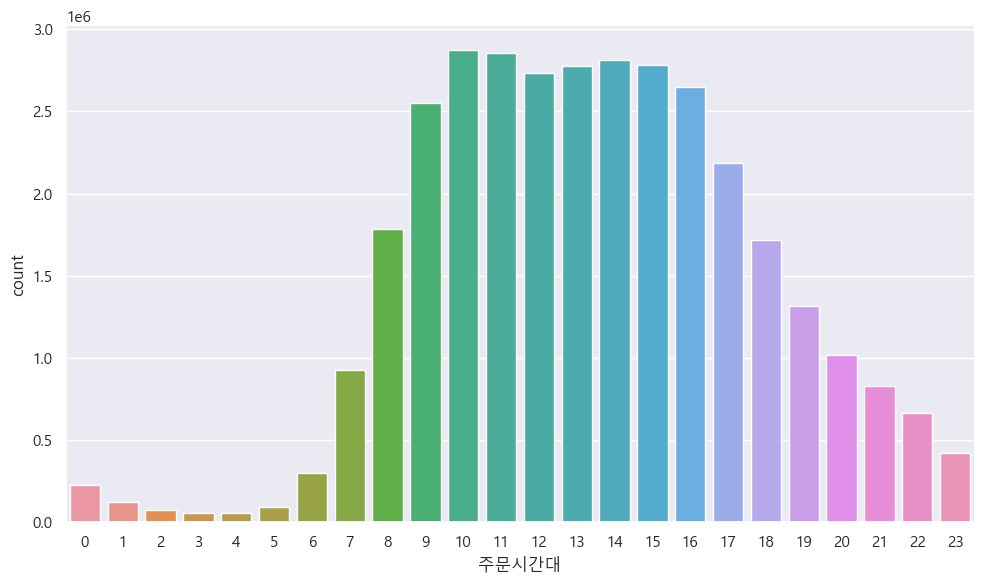

In [51]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'order_hour_of_day')
plt.xlabel('주문시간대')
plt.tight_layout()

plt.show()

In [38]:
top_product = df['product_name'].value_counts().head(10)
top_product

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

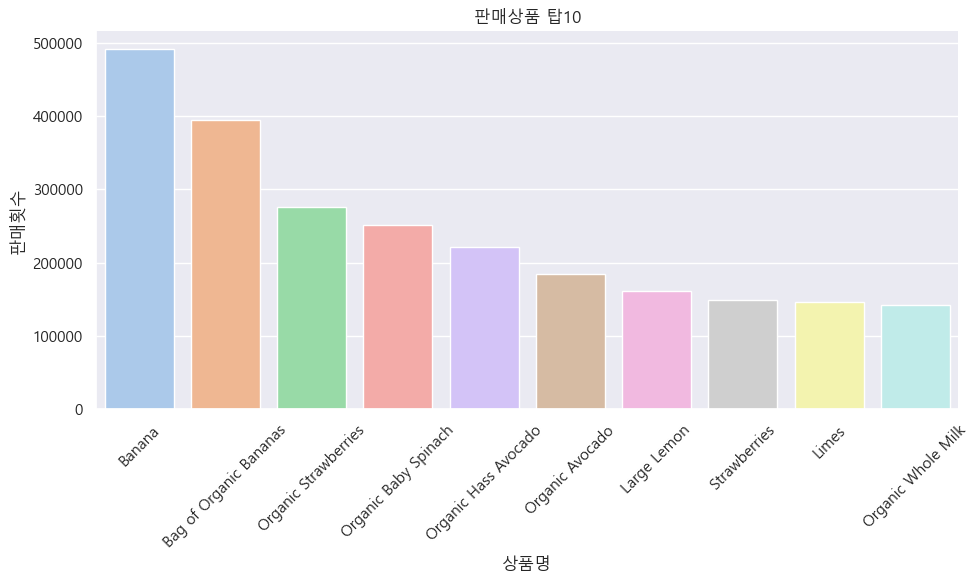

In [50]:
plt.figure(figsize=(10, 6)) 

sns.barplot(x=top_product.index, y=top_product.values)
plt.title('판매상품 탑10')
plt.xlabel('상품명')
plt.ylabel('판매횟수')

plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [54]:
# 각 제품의 재주문 횟수와 총 주문 횟수 계산
product_reorder_counts = df.groupby('product_name')['reordered'].agg(['sum', 'count'])
product_reorder_counts.columns = ['reordered_count', 'total_count']

# 재주문 비율 계산
product_reorder_counts['reorder_ratio'] = product_reorder_counts['reordered_count'] / product_reorder_counts['total_count']

# 재주문 비율 기준으로 내림차순 정렬
top_reorder_ratio = product_reorder_counts.sort_values(by='reorder_ratio', ascending=False).head(10)
top_reorder_ratio

,reordered_count,total_count,reorder_ratio
product_name,,,
Raw Veggie Wrappers,65,69,0.942029
Serenity Ultimate Extrema Overnight Pads,84,90,0.933333
Orange Energy Shots,12,13,0.923077
Chocolate Love Bar,94,102,0.921569
Soy Powder Infant Formula,32,35,0.914286
Simply Sleep Nighttime Sleep Aid,41,45,0.911111
"Energy Shot, Grape Flavor",20,22,0.909091
Russian River Valley Reserve Pinot Noir,27,30,0.900000
Bars Peanut Butter,62,69,0.898551


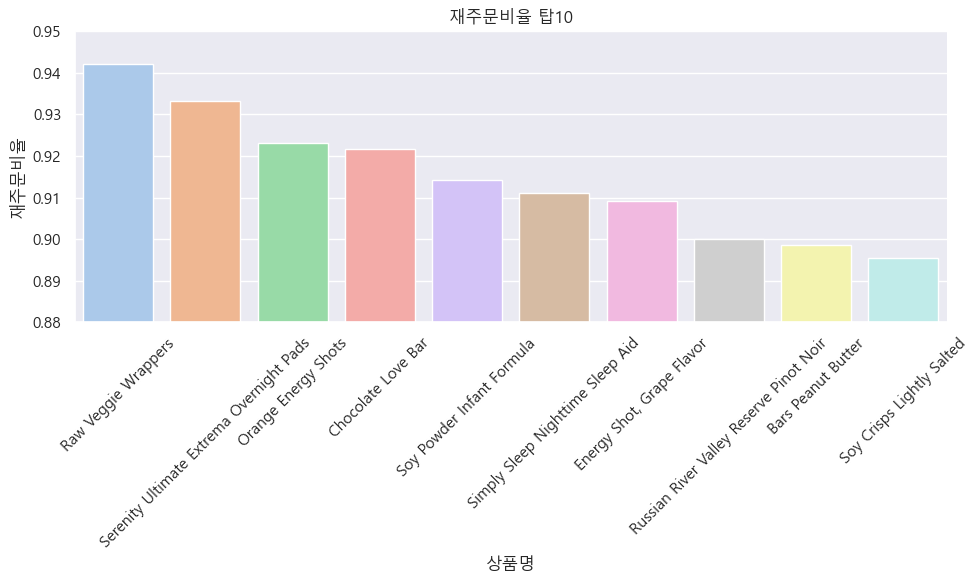

In [59]:
plt.figure(figsize=(10, 6)) 

sns.barplot(data = top_reorder_ratio, x=top_reorder_ratio.index, y='reorder_ratio')
plt.title('재주문비율 탑10')
plt.xlabel('상품명')
plt.ylabel('재주문비율')
plt.ylim(0.88, 0.95)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()